In [100]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys


sys.path.append(r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\4D_CT\Plotting")
sys.path.append(r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\4D_CT\CT")
sys.path.append(r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\4D_CT\3DTomoGAN")
from plots import *
import utils

In [101]:
factor = 8
o_name = fr"complete_clean_dataset_f{factor}"
root = r"C:\Users\Bruker\Documents\Data Aquisition"


targets = []
inputs = []
mssims = []

for i in range(20):

    target_fn = f"{o_name}_targetc_{str(i).zfill(5)}.npy"
    noisy_fn = f"{o_name}_noisyc_{str(i).zfill(5)}.npy"

    targets.append(np.load(os.path.join(root, target_fn)))
    inputs.append(np.load(os.path.join(root, noisy_fn)))

    mssims.append(utils.calc_mssim(targets[-1], inputs[-1])[0])

    print(utils.calc_ssim(targets[-1], inputs[-1]))

# inputs[5].shape
# targets[5] = targets[5][:, 401-331:401+331]

0.24338595759892886
0.17663697781420873
-0.14134272713417984
0.058137271725539265
0.593040394090135
0.23809222262226168
0.14237931243093224
0.8255652669768148
0.4565147929649628
0.48612192008764643
0.6963824269769666
0.30673329297805296
2.7636847208581237e-08
0.31780186161738166
0.20180732295763099
0.5373925560316979
0.2828846282644372
0.31947058981749343
0.4058047723302685
0.35246492234869264


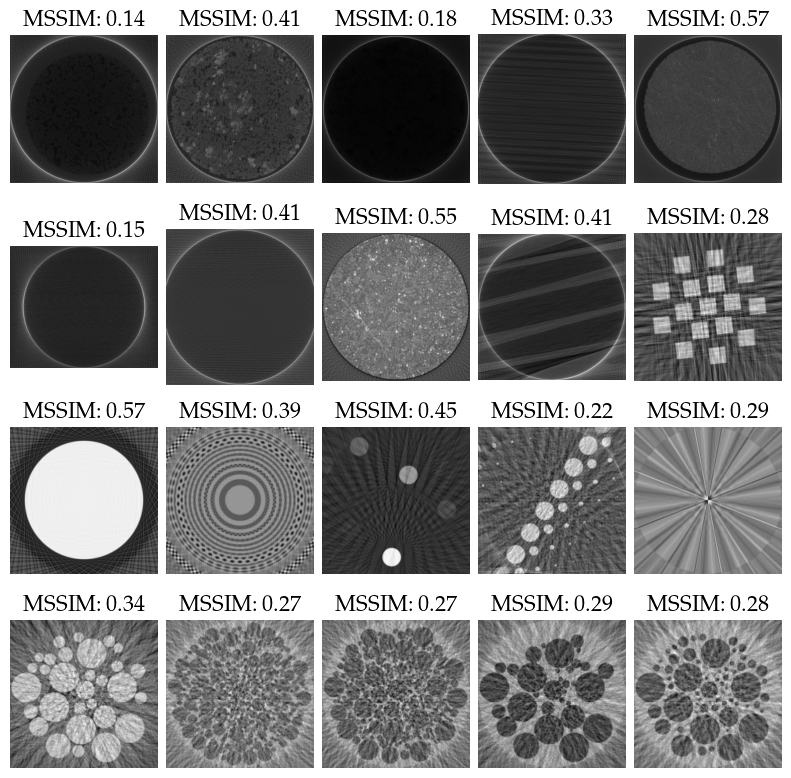

In [102]:
plot_slice_grid(
    inputs,
    titles=[f"MSSIM: {mssims[i]:.2f}" for i in range(len(inputs))],
    ns=(4, 5),
    fs = (2,2),
    savefig=True,
    folder="Data",
    savefile="Input_data_complete",)

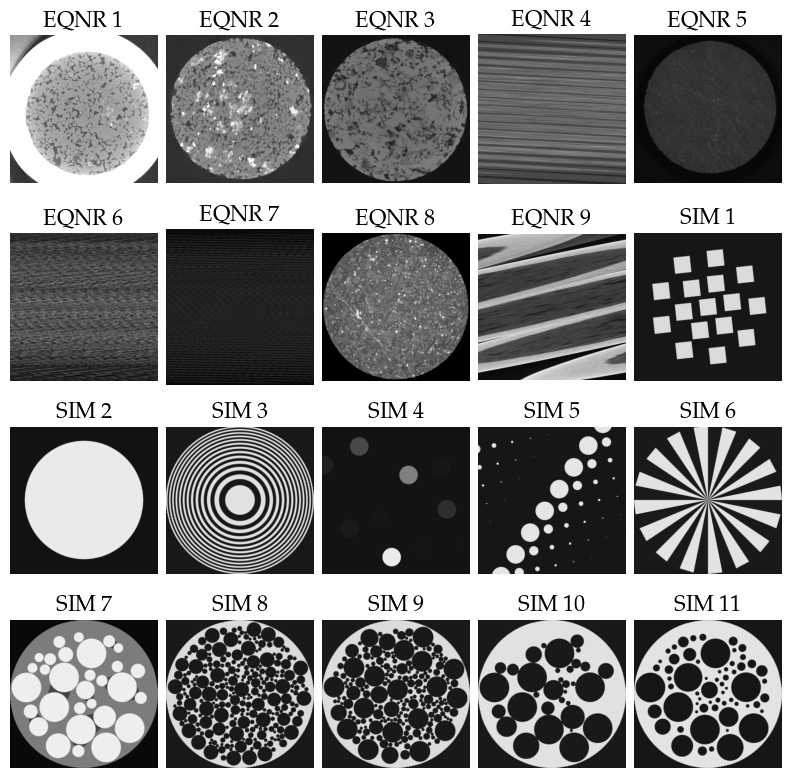

In [26]:
target_labels = [f"EQNR {i}" for i in range(1,10)]
target_labels.extend([f"SIM {i}" for i in range(1,12)])
plot_slice_grid(
    targets,
    target_labels,
    ns=(4, 5),
    fs = (2,2),
    savefig=True,
    folder="Data",
    savefile="Target_data_complete",)    


#RSD: Must be an issue reading some of the .raw files. 


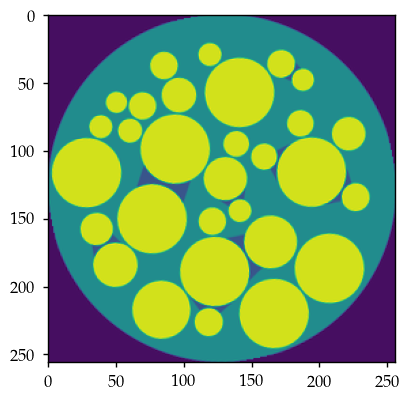

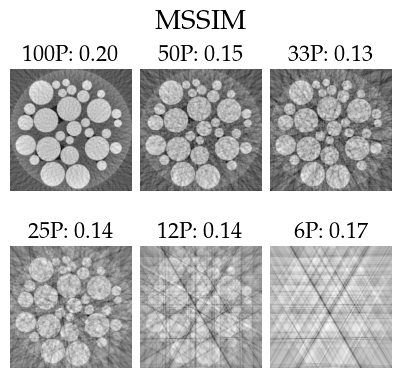

In [99]:
fs = [4, 8, 12, 16, 32, 64]
o_names = [fr"simulated_data_factor{f}_SIM7.npy" for f in [4, 8, 12, 16, 32, 64]]
root = r"C:\Users\Bruker\Documents\Data Aquisition"
arrs = []
sim7_mssims = []


for i, o in enumerate(o_names):
    arrs.append(np.load(os.path.join(root, o)) )

    sim7_mssims.append(utils.calc_mssim(targets[15], arrs[-1])[0])

plot_slice_grid(
    arrs,
    titles=[f"{int(256*np.pi/2 /fs[i])}P: {sim7_mssims[i]:.2f}" for i in range(len(arrs))],
    suptitle= "MSSIM",
    ns=(2, 3),
    fs = (1,1),
    savefig=False,
    folder="Data",
    savefile="Input_data_sim7",)




In [103]:
factor = 8
o_name = fr"complete_clean_dataset_f{factor}"
root = r"C:\Users\Bruker\Documents\Data Aquisition"


targetsXZ = []
inputsXZ = []
mssimsXZ = []

for i in range(20):

    target_fn = f"{o_name}_targetXZ_{str(i).zfill(5)}.npy"
    noisy_fn = f"{o_name}_noisyXZ_{str(i).zfill(5)}.npy"

    targetsXZ.append(np.load(os.path.join(root, target_fn)))
    inputsXZ.append(np.load(os.path.join(root, noisy_fn)))

    mssimsXZ.append(utils.calc_mssim(targetsXZ[-1], inputsXZ[-1])[0])

    print(utils.calc_ssim(targetsXZ[-1], inputsXZ[-1]))

0.5056890554691996
0.5967054184812619
-0.009276393452949217
0.6579140820134569
0.7519550435618668
0.2985441996975367
0.6309270730875183
0.9306463695121125
0.6146710640366692
0.4776103211186231
0.6619476424818278
0.3595466727536992
1.3451586081174948e-07
0.2514376149822083
0.12818464093542586
0.6907407484732073
0.21985218732976008
0.24168320670153046
0.3882051250657299
0.3496319918806769


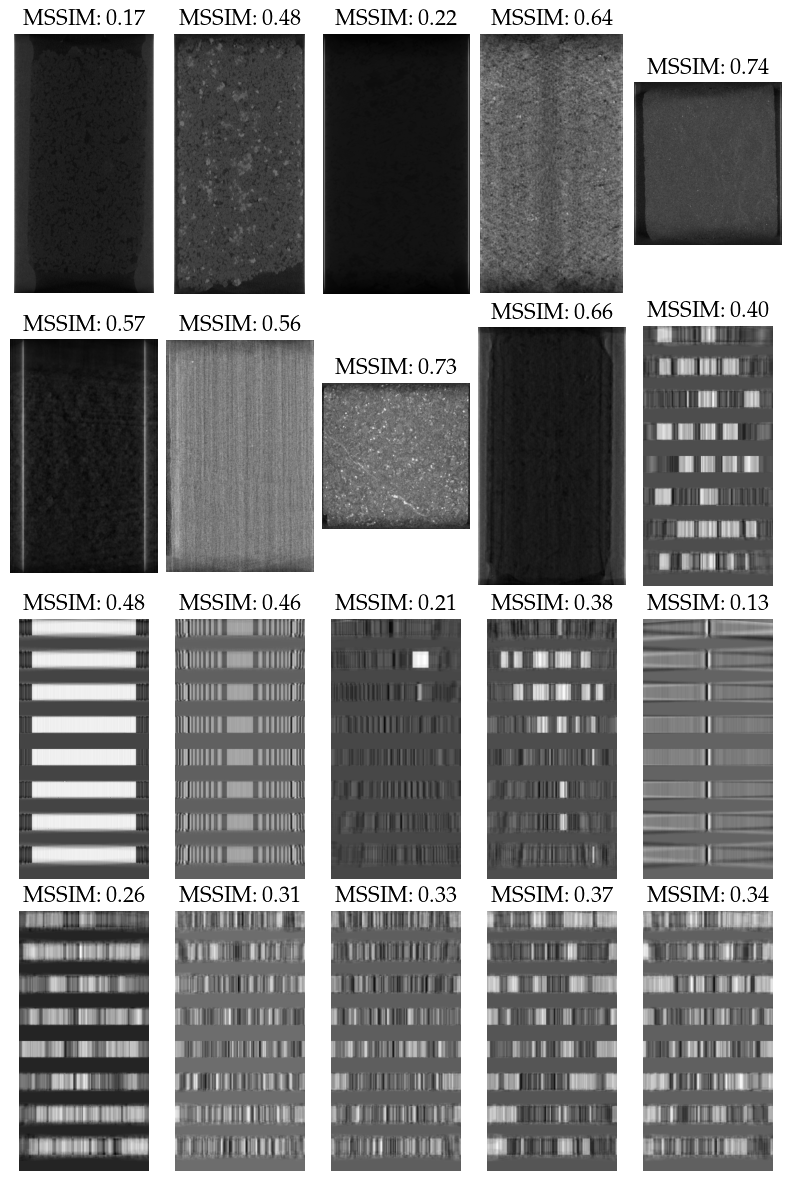

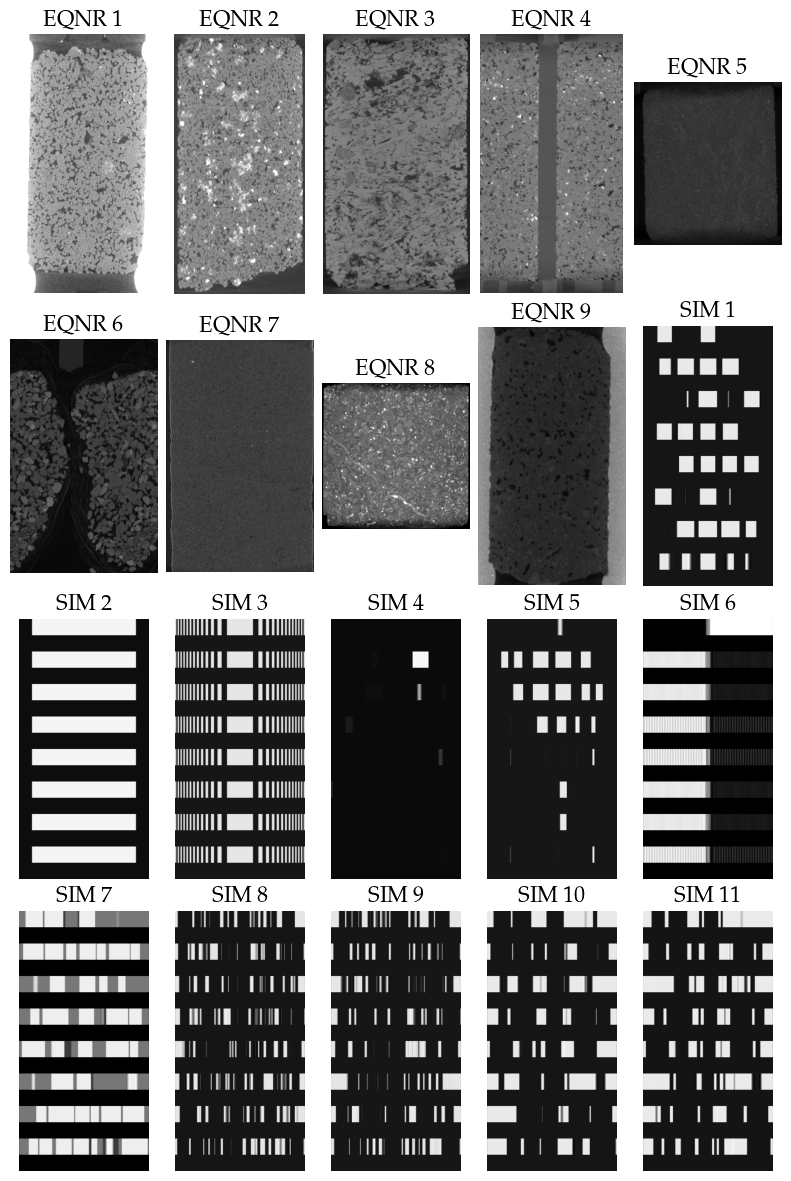

In [105]:
plot_slice_grid(
    inputsXZ,
    titles=[f"MSSIM: {mssimsXZ[i]:.2f}" for i in range(len(inputs))],
    ns=(4, 5),
    fs = (3,2),
    savefig=True,
    folder="Data",
    savefile="Input_data_completeXZ",)

target_labels = [f"EQNR {i}" for i in range(1,10)]
target_labels.extend([f"SIM {i}" for i in range(1,12)])
plot_slice_grid(
    targetsXZ,
    target_labels,
    ns=(4, 5),
    fs = (3,2),
    savefig=True,
    folder="Data",
    savefile="Target_data_completeXZ",)    

In [106]:
factor = 8
o_name = fr"complete_clean_dataset_f{factor}_SIRT"
root = r"C:\Users\Bruker\Documents\Data Aquisition"

sirt_c = []
sirt_xz = []
sirt_c_mssims = []
sirt_xz_mssims = []

for i in range(19):

    sirt_c_fn = f"{o_name}_noisyc_{str(i).zfill(5)}.npy"
    sirt_xz_fn = f"{o_name}_noisyXZ_{str(i).zfill(5)}.npy"

    sirt_c.append(np.load(os.path.join(root, sirt_c_fn)))
    sirt_xz.append(np.load(os.path.join(root, sirt_xz_fn)))



    if i >=2:
        mssim_c = utils.calc_mssim(targets[i+1], sirt_c[-1])[0]
        mssim_xz = utils.calc_mssim(targetsXZ[i+1], sirt_xz[-1])[0]
        print(targets[i+1].shape, sirt_c[-1].shape)
    else:
        mssim_c = utils.calc_mssim(targets[i], sirt_c[-1])[0]
        mssim_xz = utils.calc_mssim(targetsXZ[i], sirt_xz[-1])[0]
        print(targets[i].shape, sirt_c[-1].shape)

    sirt_c_mssims.append(mssim_c)
    sirt_xz_mssims.append(mssim_xz)
        

    #sirt_c_mssims.append(utils.calc_mssim(targets[i], sirt_c[-1])[0])
    #sirt_xz_mssims.append(utils.calc_mssim(targetsXZ[i], sirt_xz[-1])[0])

    # print(utils.calc_ssim(targets[-1], inputs[-1]))

print(targetsXZ[3].shape)
print(sirt_xz[2].shape)

sirt_c.append(targets[2])
sirt_xz.append(targetsXZ[2])

(783, 783) (783, 783)
(926, 926) (926, 926)
(1028, 1009) (1028, 1009)
(1500, 1500) (1500, 1500)
(662, 803) (662, 803)
(1180, 1120) (1180, 1120)
(1046, 1046) (1046, 1046)
(445, 449) (445, 449)
(256, 256) (256, 256)
(256, 256) (256, 256)
(256, 256) (256, 256)
(256, 256) (256, 256)
(256, 256) (256, 256)
(256, 256) (256, 256)
(256, 256) (256, 256)
(256, 256) (256, 256)
(256, 256) (256, 256)
(256, 256) (256, 256)
(256, 256) (256, 256)
(1835, 1009)
(1835, 1009)


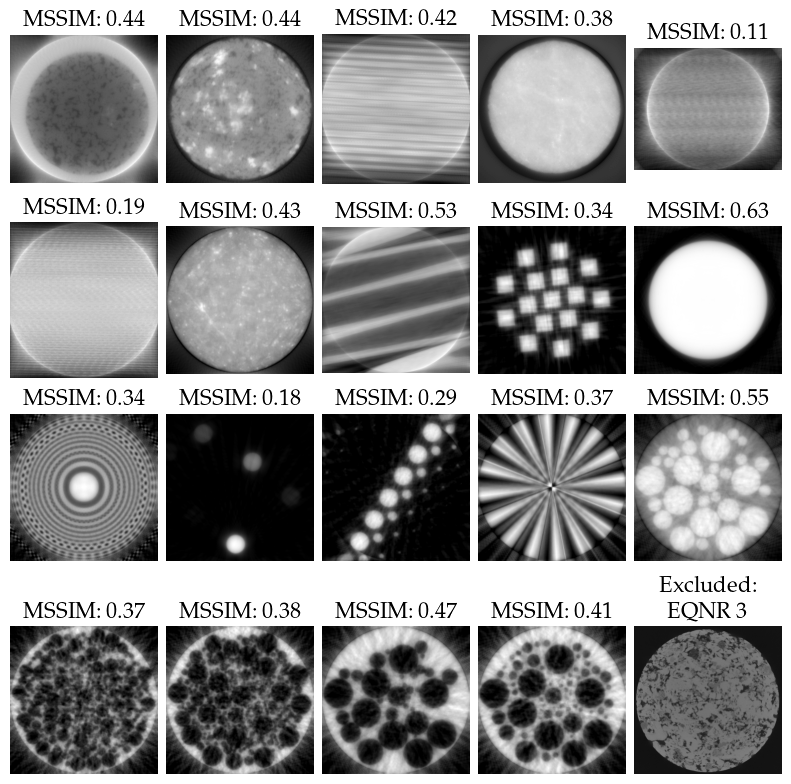

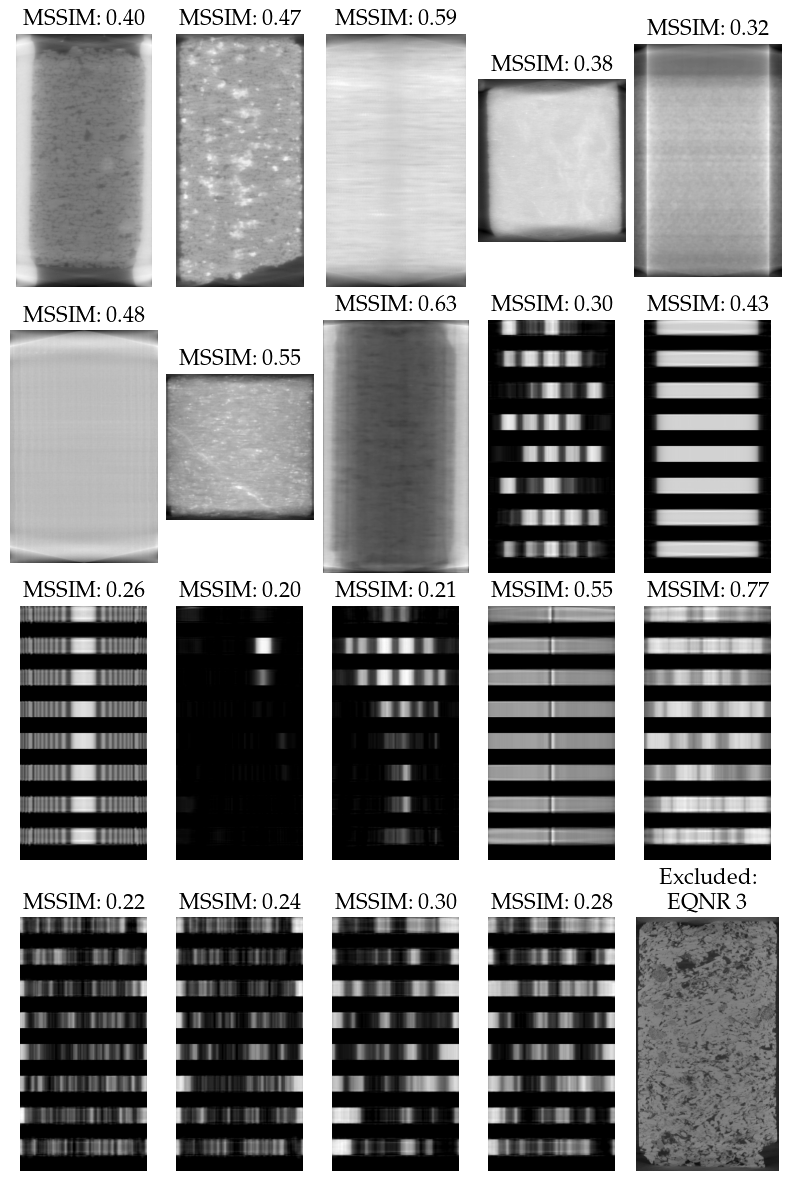

In [107]:


sirt_c_titles = [f"MSSIM: {sirt_c_mssims[i]:.2f}" for i in range(len(sirt_c)-1)]
sirt_c_titles.append( "Excluded:\nEQNR 3")

sirt_xz_titles = [f"MSSIM: {sirt_xz_mssims[i]:.2f}" for i in range(len(sirt_xz)-1)]
sirt_xz_titles.append( "Excluded:\nEQNR 3")


plot_slice_grid(
    sirt_c,
    titles=sirt_c_titles,
    ns=(4, 5),
    fs = (2,2),
    savefig=True,
    folder="Data",
    savefile="SIRT_data_complete_c"
)

plot_slice_grid(
    sirt_xz,
    titles=sirt_xz_titles,
    ns=(4, 5),
    fs = (3,2),
    savefig=True,
    folder="Data",
    savefile="SIRT_data_complete_xz"
)